<a href="https://www.kaggle.com/code/yousefgomaa43/nn-arabic-handwriting-320210207?scriptVersionId=155274792" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div> <center> <b> NN Arabic Handwriting Recognition </b> </center> </div>

## <b> Credentials: </b> (E-JUST Submission)
- Name: Yousef Ibrahim Gomaa Mahmoud
- ID: 320210207
- Group: 1
- Section: AID 3

## <b> Notebook Workflow: </b>
- Environment Setup
- Data Pre-processing
- Data Visualization
- Model Definition
- Training the Model
- Prediction

## <b> Introduction: </b>
<p> In this notebook, a model is to be trained to <b> recognize/classify arabic letters </b> using a convolutional neural network (CNN) through Keras, a TensorFlow tool. </p>

## <b> Dataset: </b>
https://www.kaggle.com/competitions/arabic-letters-classification

## Environment Setup:
### Importing Packages

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### GPU Checkup:
Kaggle provides 2 GPUs which are relied upon heavily during the training phase.

In [2]:
for device in tf.config.list_physical_devices():
    print(": {}".format(device.name))

: /physical_device:CPU:0
: /physical_device:GPU:0
: /physical_device:GPU:1


### Loading the Dataset(s):

In [3]:
datasets = ['/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train',\
            '/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test',
           '/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset']
NUM_CLASS = 65
IMAGE_SIZE = (128,128)
BATCH_SIZE = 256
SEED = 43
LABEL_NAMES = [i for i in range(NUM_CLASS)]

- There are 65 classes to classify into (0-64)
- Images must be resized to a consistent size in order to train properly.

In [4]:
# str = "user001_heh_middle_042.png"
# str[8:18]

## Data Pre-processing:
Splitting training data into 'Training' and 'Validation' for the model to train on.

In [5]:
train_images = tf.keras.utils.image_dataset_from_directory(
    datasets[0],
    validation_split=0.2,
    color_mode="grayscale",
    label_mode="categorical",
    subset="training",
    shuffle=True,
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)


Found 42559 files belonging to 65 classes.
Using 34048 files for training.


In [6]:
train_validation = tf.keras.utils.image_dataset_from_directory(
    datasets[0],
    validation_split=0.2,
    color_mode="grayscale",
    label_mode="categorical",
    subset="validation",
    shuffle=True,
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

Found 42559 files belonging to 65 classes.
Using 8511 files for validation.


In [7]:
# train_images = tf.keras.utils.image_dataset_from_directory(
#     datasets[0],
#     color_mode="grayscale",
#     label_mode="categorical",
#     shuffle=True,
#     image_size=IMAGE_SIZE,
#     batch_size=BATCH_SIZE)

## Data Visualization:

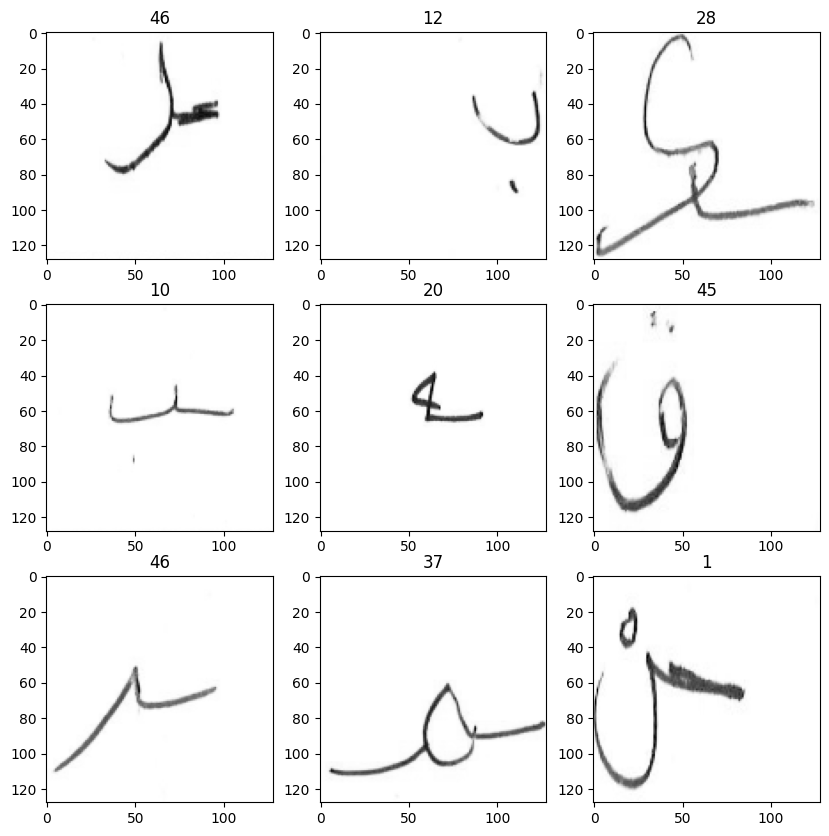

In [8]:
class_names = train_images.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_images.take(1): # Takes a batch and shows the first 9 images
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap=plt.cm.Greys_r)
        plt.title(class_names[np.where(np.array(labels[i])==1)[0][0]])

In [9]:
for images, labels in train_images:
    print(images.shape)
    print(labels.shape)
    break

(256, 128, 128, 1)
(256, 65)


- (Batch Size, Width, Height, 1 Image Tensor Channel (Greyscale))
- (Batch Size, Number of Classes)

## Model Definition:

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomZoom(height_factor=(-.2,.3), width_factor=(-.2,.3)),
    tf.keras.layers.RandomRotation((-.2,.3)),
#     tf.keras.layers.RandomWidth(.2, interpolation='bilinear'),
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', padding = 'same',  input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
# #     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu',
#                            kernel_regularizer=tf.keras.regularizers.l2(0.001)
#                          ),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASS, activation=tf.nn.softmax)
])

### Model Summary:

In [11]:
model.build(input_shape=(None, IMAGE_SIZE[0], IMAGE_SIZE[1], 1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 1)       0         
                                                                 
 random_zoom (RandomZoom)    (None, 128, 128, 1)       0         
                                                                 
 random_rotation (RandomRot  (None, 128, 128, 1)       0         
 ation)                                                          
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4

### Model Optimization:

In [12]:
model.compile(optimizer = Adam(learning_rate= 0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])

## Training the Model:

In [13]:
h1 = model.fit(train_images,
              validation_data=train_validation,
              epochs=50)

Epoch 1/50
133/133 [==============================] - 61s 354ms/step - loss: 4.0817 - accuracy: 0.0307 - val_loss: 3.9363 - val_accuracy: 0.0540
Epoch 2/50
133/133 [==============================] - 17s 125ms/step - loss: 3.5271 - accuracy: 0.1089 - val_loss: 3.0749 - val_accuracy: 0.1840
Epoch 3/50
133/133 [==============================] - 16s 115ms/step - loss: 3.0604 - accuracy: 0.1983 - val_loss: 2.5961 - val_accuracy: 0.2798
Epoch 4/50
133/133 [==============================] - 16s 118ms/step - loss: 2.7314 - accuracy: 0.2683 - val_loss: 2.2271 - val_accuracy: 0.3655
Epoch 5/50
133/133 [==============================] - 16s 117ms/step - loss: 2.3182 - accuracy: 0.3598 - val_loss: 1.8667 - val_accuracy: 0.4568
Epoch 6/50
133/133 [==============================] - 17s 119ms/step - loss: 2.0552 - accuracy: 0.4258 - val_loss: 1.6422 - val_accuracy: 0.5123
Epoch 7/50
133/133 [==============================] - 16s 114ms/step - loss: 1.8345 - accuracy: 0.4791 - val_loss: 1.5121 - val_ac

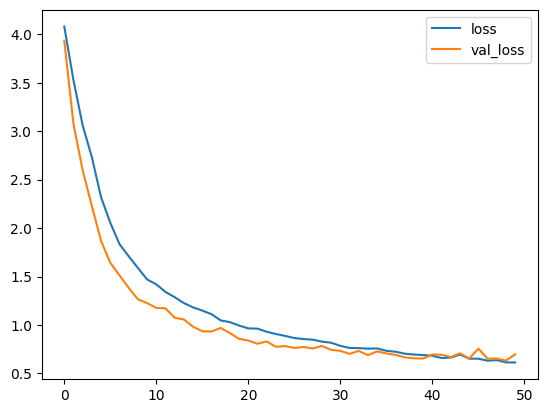

In [14]:
plt.plot(h1.history['loss'], label='loss')
plt.plot(h1.history['val_loss'], label='val_loss')
plt.legend()

Re-training:

In [15]:
# h2 = model.fit(train_images, validation_data=train_validation, epochs=20)

Model starting to overfit from here on:

In [16]:
# plt.plot(h2.history['loss'], label='loss')
# plt.plot(h2.history['val_loss'], label='val_loss')
# plt.legend()

### Saving the Model:

Keras format:

In [17]:
# model.save('nn-arabic-handwriting-320210207.keras')

### Loading the Model:

In [18]:
# model = tf.keras.models.load_model('nn-arabic-handwriting-320210207.keras')

## Prediction:

Loading the 'Test' dataset:

In [19]:
test_images = tf.keras.utils.image_dataset_from_directory(
        datasets[1],
        labels=None,
        color_mode="grayscale",
        label_mode="categorical",
        shuffle=False,
        image_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE)

Found 10640 files belonging to 1 classes.


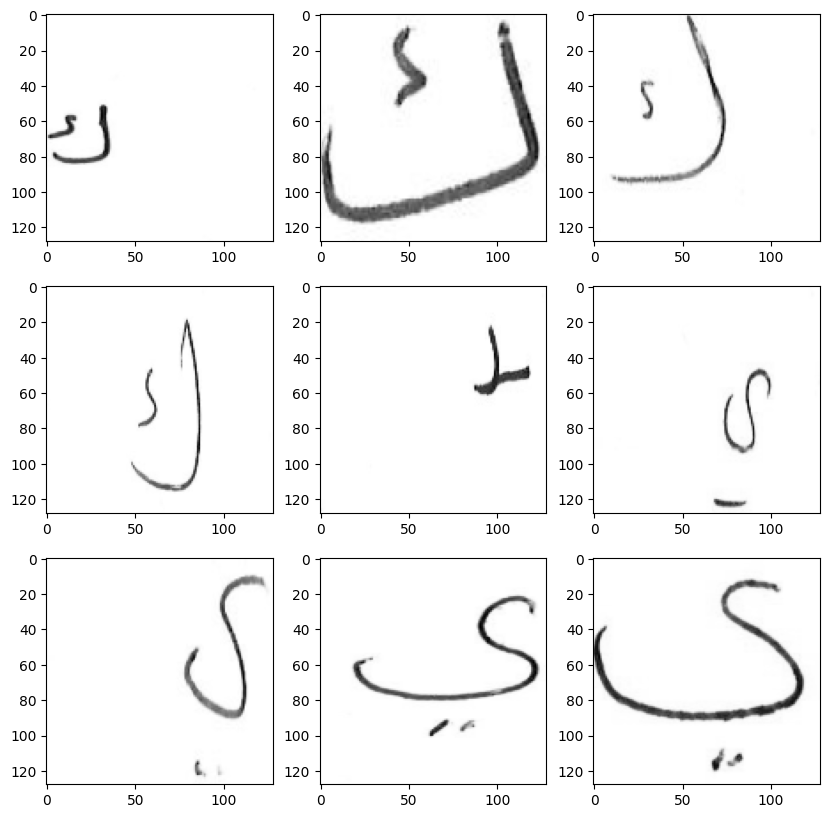

In [20]:
plt.figure(figsize=(10, 10))
for images in test_images.take(1): # Takes a batch and shows the first 9 images
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap=plt.cm.Greys_r)

In [21]:
for images in test_images:
    print(images.shape)
    break

(256, 128, 128, 1)


In [22]:
predictions = model.predict(test_images)

42/42 [==============================] - 12s 299ms/step


In [23]:
img_list = os.listdir(datasets[1])

In [24]:
predictions[1][29]

3.8268374e-13

## Making 'predictions.csv':

In [25]:
predictions.shape

(10640, 65)

In [26]:
df_predictions = pd.DataFrame(columns=['ID','Label'], dtype=(np.int32,np.int32))

predictions_mod = np.argmax(predictions, 1)

for idx,image in enumerate(sorted(img_list)):
#     print(image, predictions_mod[idx])
    df2 = pd.DataFrame([[int(image.split(".")[0]), int(predictions_mod[idx])]], columns=['ID','Label'])
    df_predictions = pd.concat([df_predictions, df2])

In [27]:
print(predictions_mod)

[22 22 22 ... 61 61 61]


In [28]:
df_predictions.head()

,ID,Label
0,0,22
0,1,22
0,10,22
0,100,22
0,1000,5


In [29]:
df_predictions.sort_values(by='ID', inplace=True)

In [30]:
df_predictions.reset_index(drop=True)

,ID,Label
0,0,22
1,1,22
2,2,22
3,3,22
4,4,22
...,...,...
10635,10635,62
10636,10636,58
10637,10637,64
10638,10638,64


In [31]:
df_predictions.to_csv('predictions.csv', index=False, header=True) 